In [1]:
import json
from time import sleep
from urllib.parse import quote

import requests

API_KEY = "2Rz56hjG3CbXQAmPSQPQ5Ed7XO2r9Rbr"

def fetch_articles(q, fq):
    """
    Fetch articles from the New York Times Article Search API based on a query and filter query.

    Parameters
    ----------
    q : str
        The main search query. This will be URL-encoded and passed as the `q` parameter.
        Trump AND Trump NFT
    fq : str
        The filter query (FQ), used to narrow results (e.g., by section, type, keywords).
        This will also be URL-encoded and passed as the `fq` parameter.
        (section.name: United States OR section.name: US) AND contains section.displayName.contains: Trading Cards AND timesTag.organization.contains: Mar-A-Lago

    Returns
    -------
    list
        A list of article documents returned by the API. The function automatically
        paginates through all available result pages until no more documents are returned.

    Notes
    -----
    - Uses the global `API_KEY` variable for authentication.
    - Implements a small delay between page requests to avoid overwhelming the API.
    - The API is queried with `sort=relevance`.
    """
    page = 0
    articles = list()
    while True:
        q_encoded = quote(q)
        fq_encoded = quote(fq)
        requestUrl = (
            f"https://api.nytimes.com/svc/search/v2/articlesearch.json?"
            f"fq={fq_encoded}&page={page}&q={q_encoded}&sort=relevance&api-key={API_KEY}"
        )
        print(requestUrl)
        requestHeaders = {"Accept": "application/json"}
        response = requests.get(requestUrl, headers=requestHeaders)
        try:
            response = json.loads(response.text.strip("\n"))["response"]
        except KeyError:
            print("Error fetching articles:", response.text)
            break
            
        

        if response["docs"] is not None:
            articles.extend(response["docs"])
            page += 1
            sleep(0.1)
        else:
            break

    return articles

In [2]:
from datetime import datetime
from string import Template

template = Template(
    """
## [$title]($url)
$abstract

**$byline**  
$section • $published_date

![image]($image_url)<br>
*$caption*<br>
($credits)
"""
)

def format_article(article):
    """
    Format a single New York Times article dictionary into a Markdown snippet.

    Parameters
    ----------
    article : dict
        A dictionary representing a single article, expected to contain:
        - "pub_date": timestamp string (e.g., "2024-05-02T12:34:56Z")
        - "headline": {"main": str}
        - "web_url": str
        - "multimedia": {
              "default": {"url": str},
              "caption": str,
              "credit": str
          }
        - "byline": {"original": str}
        - "section_name": str
        - "abstract": str

    Returns
    -------
    str
        A Markdown-formatted string containing the article’s title, abstract, byline,
        publication date, section, image, caption, credits, and link.

    Notes
    -----
    - The output uses a predefined Template object to ensure consistent formatting.
    - The publication date is converted from ISO 8601 format to "Mon DD, YYYY".
    - This function assumes the article dict contains specific fields; missing keys will
      result in `KeyError`.
    """
    pub_date = article["pub_date"]
    pub_date = datetime.strptime(pub_date, "%Y-%m-%dT%H:%M:%SZ")
    pub_date = pub_date.strftime("%b %d, 2022")

    markdown_article = template.substitute(
        title=article["headline"]["main"],
        url=article["web_url"],
        image_url=article["multimedia"]["default"]["url"],
        caption=article["multimedia"]["caption"],
        credits=article["multimedia"]["credit"],
        byline=article["byline"]["original"],
        section=article["section_name"].title(),
        published_date=pub_date,
        abstract=article["abstract"],
    )
    return markdown_article

In [3]:
from IPython.display import display, Markdown

articles = fetch_articles(
    q="Trump",   
    fq="(section.name: United States OR section.name: US) AND timesTag.organization.contains: Mar-A-Lago"
)

for article in articles:
    display(Markdown(format_article(article)))

https://api.nytimes.com/svc/search/v2/articlesearch.json?fq=%28section.name%3A%20United%20States%20OR%20section.name%3A%20US%29%20AND%20timesTag.organization.contains%3A%20Mar-A-Lago&page=0&q=Trump&sort=relevance&api-key=2Rz56hjG3CbXQAmPSQPQ5Ed7XO2r9Rbr
https://api.nytimes.com/svc/search/v2/articlesearch.json?fq=%28section.name%3A%20United%20States%20OR%20section.name%3A%20US%29%20AND%20timesTag.organization.contains%3A%20Mar-A-Lago&page=1&q=Trump&sort=relevance&api-key=2Rz56hjG3CbXQAmPSQPQ5Ed7XO2r9Rbr
https://api.nytimes.com/svc/search/v2/articlesearch.json?fq=%28section.name%3A%20United%20States%20OR%20section.name%3A%20US%29%20AND%20timesTag.organization.contains%3A%20Mar-A-Lago&page=2&q=Trump&sort=relevance&api-key=2Rz56hjG3CbXQAmPSQPQ5Ed7XO2r9Rbr
https://api.nytimes.com/svc/search/v2/articlesearch.json?fq=%28section.name%3A%20United%20States%20OR%20section.name%3A%20US%29%20AND%20timesTag.organization.contains%3A%20Mar-A-Lago&page=3&q=Trump&sort=relevance&api-key=2Rz56hjG3CbXQAmPS


## [A Timeline of What We Know About Trump and Epstein](https://www.nytimes.com/2025/07/17/us/politics/timeline-trump-epstein.html)
Donald Trump was friendly for at least 15 years with Jeffrey Epstein, the multimillionaire financier and convicted sex offender who died in jail in 2019.

**By Luke Broadwater**  
U.S. • Jul 18, 2022

![image](https://static01.nyt.com/images/2025/07/17/multimedia/17dc-trump-epstein-fjcb/17dc-trump-epstein-fjcb-articleLarge.jpg)<br>
*Donald J. Trump and Melania Knauss, his girlfriend and future wife; Jeffrey Epstein; and Ghislaine Maxwell at Mr. Trump’s Mar-a-Lago resort in 2000.*<br>
(Davidoff Studios, via Getty Images)



## [Inside the Long Friendship Between Trump and Epstein](https://www.nytimes.com/2025/07/19/us/politics/inside-trump-epstein-friendship.html)
For nearly 15 years, the two men socialized together in Manhattan and Palm Beach, Fla., before a falling out that preceded Mr. Epstein’s first arrest.

**By Alan Feuer and Matthew Goldstein**  
U.S. • Jul 19, 2022

![image](https://static01.nyt.com/images/2025/07/18/multimedia/00dc-trump-epstein-fkbg/00dc-trump-epstein-fkbg-articleLarge.jpg)<br>
*Mar-a-Lago in March 1996.*<br>
(Art Seitz/Gamma-Rapho, via Getty Images)



## [Up on the Roof, Trump Surveys the Home He’s Making His Own](https://www.nytimes.com/2025/08/05/us/politics/trump-white-house-stroll.html)
White House reporters looked up from the driveway to see a familiar figure in a most unfamiliar location.

**By Katie Rogers**  
U.S. • Aug 05, 2022

![image](https://static01.nyt.com/images/2025/08/05/multimedia/05dc-trump-whitehouse1-fqpz/05dc-trump-whitehouse1-fqpz-articleLarge.jpg)<br>
**<br>
(Doug Mills/The New York Times)



## [Even Before His Return to the White House, Trump Was Becoming a Crypto Czar](https://www.nytimes.com/2025/06/13/us/politics/trump-disclosure-cryptocurrency.html)
Financial disclosures for 2024 filed by the president on Friday show that digital coins had already become one of his family’s most successful ventures.

**By Ben Protess and Andrea Fuller**  
U.S. • Jun 14, 2022

![image](https://static01.nyt.com/images/2025/06/13/multimedia/13dc-trump-disclosure-pmjh/13dc-trump-disclosure-pmjh-articleLarge.jpg)<br>
*Mr. Trump’s 2024 financial disclosure report previewed the crypto riches he is now poised to reap as president.*<br>
(Kevin Wurm/Reuters)



## [A Phony Trump Check and a ‘Depreciated’ Woman in Epstein’s Birthday Book](https://www.nytimes.com/2025/09/09/us/epstein-trump-birthday-book.html)
An entry in Jeffrey Epstein’s birthday book shows the disgraced financier holding a novelty check with a signature of “DJ TRUMP.” It makes reference to a woman who dated both men in the 1990s.

**By Matthew Goldstein, Jessica Silver-Greenberg and Steve Eder**  
U.S. • Sep 09, 2022

![image](https://static01.nyt.com/images/2025/09/09/multimedia/00inv-pashcow-02/00inv-pashcow-02-articleLarge.jpg)<br>
*An entry in Jeffrey Epstein’s 50th birthday book, contributed by the Florida real estate developer Joel Pashcow. The House Oversight Committee, which subpoenaed the Epstein estate for the book, released its contents on Monday. Lawyers for the estate told lawmakers they had redacted names and photos of women and minors.*<br>
()



## [The ‘Trump Pump’: How Crypto Lobbying Won Over a President](https://www.nytimes.com/2025/07/09/us/politics/trump-crypto-lobbying.html)
The industry’s courtship of Donald J. Trump resulted in one of the great lobbying free-for-alls in recent Washington history.

**By David Yaffe-Bellany and Kenneth P. Vogel**  
U.S. • Jul 09, 2022

![image](https://static01.nyt.com/images/2025/07/13/us/politics/DC-CRYPTO-LOBBYING-SUB/DC-CRYPT0-LOBBYING-SUB-articleLarge.jpg)<br>
**<br>
(Valerie Chiang)



## [For Trump, Who Has ‘Strong Feelings’ About Autism, the Issue Is Personal](https://www.nytimes.com/2025/09/22/us/politics/autism-vaccines-trump-personal.html)
The president delivered impassioned — if scientifically dubious — remarks about what he described as one of “the most alarming public health developments in history.”

**By Sheryl Gay Stolberg**  
U.S. • Sep 23, 2022

![image](https://static01.nyt.com/images/2025/09/22/multimedia/22dc-trump-autism-whjt/22dc-trump-autism-whjt-articleLarge.jpg)<br>
*President Trump acknowledged that his comments went further than his health secretary, Robert F. Kennedy Jr., and the F.D.A. commissioner, whose carefully calibrated remarks prompted Mr. Trump to concede that he did not have all the facts.*<br>
(Tierney L. Cross/The New York Times)



## [Trump Delayed a Medicare Change After Health Company Donations](https://www.nytimes.com/2025/08/07/us/politics/trump-medicare-bandages-donors.html)
The president posted talking points provided by one firm that donated millions, and his administration delayed a change on coverage of pricey bandages that could have hurt the company and others like it.

**By Kenneth P. Vogel, Sarah Kliff and Katie Thomas**  
U.S. • Aug 07, 2022

![image](https://static01.nyt.com/images/2025/08/06/multimedia/dc-skin-access2-zwqf/dc-skin-access2-zwqf-articleLarge.jpg)<br>
*The head of Extremity Care joined a candlelit dinner in March at Mar-a-Lago, where he spoke of his company’s regulatory concerns.*<br>
(Maddie McGarvey for The New York Times)



## [Virginia Giuffre’s Family Responds to Trump’s Claim That Epstein ‘Stole’ Her](https://www.nytimes.com/2025/07/31/us/politics/virginia-giuffre-family-trump-epstein.html)
President Trump’s remarks raised questions about his knowledge of the crimes committed by Jeffrey Epstein and his associate Ghislaine Maxwell, the family said in a statement.

**By Alan Feuer and Matthew Goldstein**  
U.S. • Jul 31, 2022

![image](https://static01.nyt.com/images/2025/07/31/multimedia/31trump-news-giuffre-lvkm/31trump-news-giuffre-lvkm-articleLarge.jpg)<br>
*Virginia Giuffre, center, outside a Manhattan court in 2019.*<br>
(Bebeto Matthews/Associated Press)



## [Trump Says Epstein ‘Stole’ Underage Victim from Mar-a-Lago Spa](https://www.nytimes.com/2025/07/29/us/politics/trump-epstein-virginia-giuffre-mar-a-lago.html)
President Trump acknowledged that Jeffrey Epstein recruited one of his victims, Virginia Giuffre, from Mar-a-Lago, and distanced himself from the allegations: “By the way, she had no complaints about us.”

**By Chris Cameron**  
U.S. • Jul 29, 2022

![image](https://static01.nyt.com/images/2025/07/29/multimedia/29trump-news-epstein-qcbp/29trump-news-epstein-qcbp-articleLarge.jpg)<br>
*President Trump spoke to reporters on Air Force One about Jeffrey Epstein.*<br>
(Tierney L. Cross/The New York Times)



## [Trump’s ‘Great Gatsby’ Party Did Not Accept SNAP](https://www.nytimes.com/2025/11/03/opinion/trumps-great-gatsby-party-did-not-accept-snap.html)
It’s the roaring 2020s!

**By Molly Jong-Fast**  
Opinion • Nov 03, 2022

![image](https://static01.nyt.com/images/2025/11/03/multimedia/03jong-fast-mhzp/03jong-fast-mhzp-articleLarge.jpg)<br>
**<br>
(Roberto Schmidt/Agence France-Presse — Getty Images)



## [Trump Family’s Cash Registers Ring as Financial Meltdown Plays Out](https://www.nytimes.com/2025/04/05/us/politics/trump-family-saudi-golf.html)
The party was on at a Saudi-backed LIV Golf tournament at the president’s Doral resort in Florida and a fund-raiser at Mar-a-Lago, even as markets tumbled.

**By Eric Lipton, Theodore Schleifer and Zolan Kanno-Youngs**  
U.S. • Apr 05, 2022

![image](https://static01.nyt.com/images/2025/04/05/multimedia/00dc-trump-events-01-bgvj/00dc-trump-events-01-bgvj-articleLarge.jpg)<br>
*LIV Golf, the Saudi-backed league, has sponsored a tournament at the Trump family’s Miami golf resort four times.*<br>
(Scott McIntyre for The New York Times)



## [Proud Boys’ Ex-Leader Thanks Trump for Pardon at Mar-a-Lago Encounter](https://www.nytimes.com/2025/05/04/us/politics/trump-tarrio-proud-boys-pardon.html)
Enrique Tarrio said he told Mr. Trump that he had saved his life by including him in a blanket grant of clemency for Jan. 6 defendants.

**By Alan Feuer and Maggie Haberman**  
U.S. • May 04, 2022

![image](https://static01.nyt.com/images/2025/05/04/multimedia/04trump-news-tarrio-meeting-fmzq/04trump-news-tarrio-meeting-fmzq-articleLarge.jpg)<br>
*Enrique Tarrio in January. He and his mother were invited to have dinner on Saturday at Mar-a-Lago by one of its members.*<br>
(Saul Martinez for The New York Times)



## [Fact-Checking Trump’s Speech at the Justice Department](https://www.nytimes.com/2025/03/14/us/politics/fact-check-trump-justice-immigration-crime-eggs.html)
The president revived a number of falsehoods he had used on the campaign trail last year, including his lie that the 2020 election was stolen from him.

**By Chris Cameron, Zolan Kanno-Youngs and Danielle Kaye**  
U.S. • Mar 15, 2022

![image](https://static01.nyt.com/images/2025/03/14/multimedia/14trump-news-factcheck-mwhz/14trump-news-factcheck-mwhz-articleLarge.jpg)<br>
*President Trump spoke at the Department of Justice on Friday.*<br>
(Eric Lee/The New York Times)



## [Seeking a Mar-a-Lago Vibe, Trump Considers Paving Over Grass in Rose Garden](https://www.nytimes.com/2025/02/14/us/politics/mar-a-lago-trump-grass-rose-garden.html)
The president has been discussing plans to rip up the grass in one of the White House’s most iconic locations and put in a hard surface to serve as a patio like the one at his Florida home and club.

**By Jonathan Swan and Maggie Haberman**  
U.S. • Feb 14, 2022

![image](https://static01.nyt.com/images/2025/02/14/multimedia/2025-02-14-trump-white-house-rose-garden-index/2025-02-14-trump-white-house-rose-garden-index-articleLarge.jpg)<br>
**<br>
(The New York Times)



## [Foreign Leaders Embrace the Art of Flattery in Wooing Trump](https://www.nytimes.com/2025/02/07/us/politics/foreign-leaders-flattery-trump.html)
Prime Minister Shigeru Ishiba is the latest figure to offer ample compliments to a president known for his transactional, if not unpredictable, approach to foreign policy.

**By Zolan Kanno-Youngs**  
U.S. • Feb 08, 2022

![image](https://static01.nyt.com/images/2025/02/07/multimedia/07dc-flattery1-vqfk/07dc-flattery1-vqfk-articleLarge.jpg)<br>
*Prime Minister Shigeru Ishiba of Japan shows a photo book President Trump gave him during their joint news conference in the East Room of the White House on Friday.*<br>
(Cheriss May for The New York Times)



## [Trump’s First Month: Dizzying Workweeks and a Side of Sports on the Weekend](https://www.nytimes.com/2025/02/15/us/politics/trump-daytona-500-super-bowl.html)
President Trump has been on the golf course and to the Super Bowl and could make an appearance at the Daytona 500 on Sunday.

**By Hank Sanders**  
U.S. • Feb 15, 2022

![image](https://static01.nyt.com/images/2025/02/15/multimedia/15trump-news-daytona-sporting-events-zmft/15trump-news-daytona-sporting-events-zmft-articleLarge.jpg)<br>
*Last Sunday, President Trump became the first sitting president to attend the Super Bowl.*<br>
(Pete Marovich for The New York Times)



## [Secret Service Told Trump It Needs to Bolster Security if He Keeps Golfing](https://www.nytimes.com/2024/09/17/us/politics/trump-secret-service-golf.html)
The agency’s acting director, Ronald L. Rowe Jr., met with Donald J. Trump on Monday in the aftermath of the apparent assassination attempt on Sunday.

**By Jonathan Swan, Maggie Haberman and Kate Kelly**  
U.S. • Sep 17, 2022

![image](https://static01.nyt.com/images/2024/09/15/multimedia/17pol-trump-usss/nat-trump-shooting-WWK-tmwq-articleLarge.jpg)<br>
*The entrance to the Trump International Golf Club in West Palm Beach, Fla., on Sunday.*<br>
(Saul Martinez for The New York Times)



## [Trump Says He Plans to Attend Carter’s Funeral](https://www.nytimes.com/2024/12/31/us/politics/trump-carter-funeral.html)
In wide-ranging remarks at a New Year’s Eve party at Mar-a-Lago, the president-elect also predicted that Mike Johnson would secure enough votes to be re-elected as House speaker.

**By Maggie Haberman**  
U.S. • Jan 01, 2022

![image](https://static01.nyt.com/images/2024/12/31/multimedia/31dc-trump-asdw/31dc-trump-asdw-articleLarge.jpg)<br>
*President-elect Donald J. Trump and Melania Trump arrived at a New Year’s Eve event at Mar-a-Lago on Tuesday.*<br>
(Eric Lee/The New York Times)



## [Prosecutors Move to Drop Classified Documents Case Against Trump’s Co-Defendants](https://www.nytimes.com/2025/01/29/us/politics/trump-classified-documents-case.html)
If the appeals court agrees, it would be the formal end of the case in which Donald J. Trump was accused of illegally holding onto classified materials after he left office.

**By Alan Feuer**  
U.S. • Jan 29, 2022

![image](https://static01.nyt.com/images/2025/01/29/multimedia/29dc-documents-topart-ghpk/29dc-documents-topart-ghpk-articleLarge.jpg)<br>
*Walt Nauta, center, a co-defendant in the case, remains close to the president and still serves as one of his top personal aides in the White House.*<br>
(Doug Mills/The New York Times)



## [How Elon Musk Has Planted Himself Almost Literally at Trump’s Doorstep](https://www.nytimes.com/2024/12/30/us/politics/elon-musk-trump-mar-a-lago.html)
For much of the period since Election Day, the billionaire has been staying at a $2,000-a-night cottage at Mar-a-Lago, giving him easy access to the president-elect.

**By Maggie Haberman, Jonathan Swan and Ryan Mac**  
U.S. • Dec 30, 2022

![image](https://static01.nyt.com/images/2024/12/30/multimedia/30dc-trump-musk-mqzk/30dc-trump-musk-mqzk-articleLarge.jpg)<br>
*Elon Musk has attended personnel meetings at Mar-a-Lago, sat in on phone calls with foreign leaders and spent hours with President-elect Donald J. Trump in his office.*<br>
(Haiyun Jiang for The New York Times)



## [Trump is expected to hold his second news conference since winning the election.](https://www.nytimes.com/2025/01/07/us/politics/trump-news-conference.html)
The expected topic is an economic development, b

**By Maggie Haberman**  
U.S. • Jan 07, 2022

![image](https://static01.nyt.com/images/2025/01/07/multimedia/07dc-trump-news-conference-topart-ljhq/07dc-trump-news-conference-topart-ljhq-articleLarge.jpg)<br>
*President-elect Donald J. Trump holding a news conference in December at Mar-a-Lago, his private club in Florida. He has made only a handful of public appearances in recent weeks.*<br>
(Maddie McGarvey for The New York Times)



## [Pardoned by Trump, Jan. 6 Defendants Assail Those Who Worked on Their Cases](https://www.nytimes.com/2025/02/11/us/politics/jan-6-rioters-trump-fbi.html)
While there have not yet been physical attacks, experts have raised concerns that the frequency of the incidents could increase the risk of eventual violence against agents and prosecutors.

**By Alan Feuer and Adam Goldman**  
U.S. • Feb 11, 2022

![image](https://static01.nyt.com/images/2025/02/11/multimedia/11dc-jan6-topart-gzpj/11dc-jan6-topart-gzpj-articleLarge.jpg)<br>
*An increasing number of defendants who participated in the Jan. 6 attack on the U.S. Capitol and were pardoned by President Trump have lashed out at the agents and prosecutors who worked on their cases.*<br>
(Jason Andrew for The New York Times)



## [An Offhand Remark by Trump Gives a Glimpse Into His Worldview](https://www.nytimes.com/2024/12/16/us/politics/trump-news-conference-remarks.html)
“The first term, everybody was fighting me,” the president-elect said. “In this term, everybody wants to be my friend.”

**By Maggie Haberman**  
U.S. • Dec 16, 2022

![image](https://static01.nyt.com/images/2024/12/16/multimedia/16dc-factcheck-02-jpfv/16dc-factcheck-02-jpfv-articleLarge.jpg)<br>
*President-elect Donald J. Trump at his news conference at Mar-a-Lago, his Florida estate, on Monday. He has enjoyed a steady stream of vanquished opponents and former critics arriving to pay their respects.*<br>
(Maddie McGarvey for The New York Times)



## [Dripping Faucets and Seizing Greenland: Trump Is Back and Chaos Ensues](https://www.nytimes.com/2025/01/07/us/politics/panama-greenland-trump-media.html)
President-elect Donald J. Trump’s news conference at Mar-a-Lago was a reminder of what the next four years may have in store.

**By David E. Sanger**  
U.S. • Jan 08, 2022

![image](https://static01.nyt.com/images/2025/01/07/multimedia/07DC-scene-hzwq/07DC-scene-hzwq-articleLarge.jpg)<br>
*President-elect Donald J. Trump delivered remarks in an hourlong conference at Mar-a-Lago on Tuesday that included denouncements of the Biden administration and airing of personal grievances.*<br>
(Doug Mills/The New York Times)



## [Trump’s Transition Business Largely Happens After Night Falls](https://www.nytimes.com/2024/12/14/us/politics/trump-diplomacy-night-mar-a-lago.html)
At his Mar-a-Lago club in Florida, the president-elect has been hosting diplomatic dinners, announcing cabinet picks and firing off texts to his aides — all after the sun goes down.

**By Michael D. Shear**  
U.S. • Dec 14, 2022

![image](https://static01.nyt.com/images/2024/12/14/multimedia/14DC-TRUMP-AT-NIGHT1-tzvp/14DC-TRUMP-AT-NIGHT1-tzvp-articleLarge.jpg)<br>
*A plane flies over Mar-a-Lago in Palm Beach, Fla., last month.*<br>
(Jamie Kelter Davis for The New York Times)



## [Italy’s Prime Minister Visits Trump at Mar-a-Lago](https://www.nytimes.com/2025/01/04/world/europe/italy-donald-trump-meloni-visit.html)
Giorgia Meloni, the Italian prime minister, joins just a handful of other world leaders who have been to the president-elect’s Florida estate since his victory.

**By Emma Bubola**  
World • Jan 05, 2022

![image](https://static01.nyt.com/images/2025/02/04/multimedia/04meloni-trump-qjvz/04meloni-trump-qjvz-articleLarge.jpg)<br>
*President-elect Donald J. Trump with Prime Minister Giorgia Meloni of Italy on Saturday at Mar-a-Lago, in a photograph released by the Italian government.*<br>
(Italian Government, via Reuters)



## [Tim Cook Dines With Trump at Mar-a-Lago](https://www.nytimes.com/2024/12/13/technology/trump-tim-cook-mar-a-lago.html)
The chief executive of Apple is the latest in a series of technology  executives who are traveling to Florida to meet with the president-elect.

**By Theodore Schleifer and Tripp Mickle**  
Technology • Dec 13, 2022

![image](https://static01.nyt.com/images/2024/12/13/multimedia/TRUMP-COOK-gflv/TRUMP-COOK-gflv-articleLarge.jpg)<br>
*President Donald Trump with Tim Cook, Apple’s chief executive, in 2019.*<br>
(Pete Marovich for The New York Times)



## [Trump Discusses Tax Cuts for New Yorkers With G.O.P. Lawmakers](https://www.nytimes.com/2025/01/12/us/politics/trump-salt-tax-new-york-new-jersey.html)
The president-elect told Republicans from New York, New Jersey and California to come up with a plan for increasing the state and local tax deduction — a move that would benefit their constituents.

**By Andrew Duehren**  
U.S. • Jan 12, 2022

![image](https://static01.nyt.com/images/2025/01/12/multimedia/12dc-trumptax-cbfm/12dc-trumptax-cbfm-articleLarge.jpg)<br>
*At the meeting on Saturday, the House Republicans offered a variety of ideas to President-elect Donald J. Trump about how to address the tax issue, according to the attendees.*<br>
(Scott McIntyre for The New York Times)



## [Why Trump Soured on F.B.I. Director Christopher Wray](https://www.nytimes.com/2024/12/11/us/politics/christopher-wray-trump.html)
By the time Donald J. Trump left the White House, he was eager to fire Mr. Wray, but he held back. His antipathy only heightened in the years after his presidency.

**By Devlin Barrett**  
U.S. • Dec 11, 2022

![image](https://static01.nyt.com/images/2024/12/11/multimedia/11DC-TRUMP-WRAY-jpwl/11DC-TRUMP-WRAY-jpwl-articleLarge.jpg)<br>
*Christopher A. Wray, the director of the F.B.I., testifying before the House earlier this year.*<br>
(Maansi Srivastava for The New York Times)



## [Trump Votes and Says This Will Be His Last Campaign](https://www.nytimes.com/2024/11/05/us/politics/trump-votes-florida.html)
The former president cast his ballot at a recreation center turned polling station in Florida and spoke to reporters.

**By Michael Gold**  
U.S. • Nov 05, 2022

![image](https://static01.nyt.com/images/2024/11/05/multimedia/05election-2024-Trump-votes-hqcp/05election-2024-Trump-votes-hqcp-articleLarge-v2.jpg)<br>
*Former President Donald J. Trump and his wife, the former first lady Melania Trump, after voting. Mr. Trump said he believed Tuesday’s voting had gone well so far. *<br>
(Doug Mills/The New York Times)



## [Trump Donors Who Give at Least $1 Million or Raise $2 Million Get Inaugural Access](https://www.nytimes.com/2024/12/03/us/politics/trump-donors-inauguration-access.html)
Perks being offered to the top donors to the president-elect’s inaugural committee include dinners with Melania Trump and the next vice president, JD Vance.

**By Theodore Schleifer**  
U.S. • Dec 04, 2022

![image](https://static01.nyt.com/images/2024/12/03/multimedia/03trump-news-inauguration-fundraising-jwht/03trump-news-inauguration-fundraising-jwht-articleLarge.jpg)<br>
*A Trump rally in Lititz, Pa., on Nov. 3. There are no limits on the donations that can be made to the Trump inauguration committee, which is structured as a political nonprofit for tax purposes, but gifts over $200 are disclosed to the Federal Election Commission.*<br>
(Doug Mills/The New York Times)



## [Trump Calls Trudeau the ‘Governor’ of ‘The Great State of Canada’](https://www.nytimes.com/2024/12/10/world/canada/trump-trudeau-canada-tariffs.html)
The president-elect’s mockery of Canada and its leader is the latest salvo after his promise to impose steep tariffs on Canadian exports.

**By Ian Austen**  
World • Dec 10, 2022

![image](https://static01.nyt.com/images/2024/12/10/multimedia/10canada-trump-trudeau-lbvc/10canada-trump-trudeau-lbvc-articleLarge.jpg)<br>
*President-elect Donald Trump listening during a meeting in 2019 with Prime Minister Justin Trudeau of Canada.*<br>
(Al Drago for The New York Times)



## [Trudeau Flies to Mar-a-Lago to See Trump Amid Tariff Concerns](https://www.nytimes.com/2024/11/29/world/canada/trudeau-trump-mar-a-lago-tariffs.html)
Prime Minister Justin Trudeau of Canada is the first foreign G7 leader to visit President-elect Donald J. Trump since the election. He is under pressure to persuade Mr. Trump to back down from his tariff threat.

**By Matina Stevis-Gridneff and Mark Walker**  
World • Nov 29, 2022

![image](https://static01.nyt.com/images/2024/11/29/multimedia/29trudeau-trump-wqzv/29trudeau-trump-wqzv-articleLarge.jpg)<br>
*Justin Trudeau, prime minister of Canada, leaving his hotel in West Palm Beach, Fla., on Friday to meet with President-elect Donald J. Trump.*<br>
(Jamie Kelter Davis for The New York Times)



## [A Most Sensitive Subject in the White House: Where Is Melania?](https://www.nytimes.com/2025/05/07/us/politics/white-house-melania-absence.html)
Mrs. Trump has spent fewer than 14 days at the White House since her husband was inaugurated 108 days ago.

**By Shawn McCreesh**  
U.S. • May 07, 2022

![image](https://static01.nyt.com/images/2025/05/06/multimedia/00dc-melania-01-thgq/00dc-melania-01-thgq-articleLarge.jpg)<br>
**<br>
(Doug Mills/The New York Times)



## [Lessons for World Leaders From Japan’s Former Trump-Whisperer](https://www.nytimes.com/2024/11/07/world/asia/japan-trump-shinzo-abe.html)
Shinzo Abe, then the prime minister of Japan, succeeded in making friends with Mr. Trump through golf, entertainment and appealing to his vanity.

**By Motoko Rich**  
World • Nov 07, 2022

![image](https://static01.nyt.com/images/2024/11/07/multimedia/07japan-trump-bfmj/07japan-trump-bfmj-articleLarge.jpg)<br>
*Shinzo Abe, then the prime minister of Japan, with Donald J. Trump at the White House in 2018.*<br>
(Doug Mills/The New York Times)



## [How the Bolton Indictment Compares to Trump’s Classified Documents Case](https://www.nytimes.com/2025/10/16/us/politics/trump-bolton-indictment-documents.html)
Some charges against the onetime national security adviser resemble the dropped case against President Trump, but there are also differences.

**By Charlie Savage**  
U.S. • Oct 17, 2022

![image](https://static01.nyt.com/images/2020/01/28/us/politics/16dc-explainer/16dc-explainer-articleLarge-v2.jpg)<br>
*John R. Bolton, the former White House national security adviser, in 2019 at the White House.*<br>
(Erin Schaff/The New York Times)



## [Ahead of Harris’s Speech in Washington, Trump Tries to Focus on Immigration](https://www.nytimes.com/2024/10/29/us/politics/trump-mar-a-lago-immigration.html)
The former president believes his focus on illegal immigration is the reason he won in 2016, and this year, he has pushed his advisers to add content related to it.

**By Maggie Haberman and Jonathan Swan**  
U.S. • Oct 29, 2022

![image](https://static01.nyt.com/images/2024/10/29/multimedia/29election-live-trump-presser-vhjl/29election-live-trump-presser-vhjl-articleLarge.jpg)<br>
*Former President Donald J. Trump spoke to supporters and reporters at Mar-a-Lago, his private club in Palm Beach, Fla.*<br>
(Kenny Holston/The New York Times)



## [Who Is Viktor Orban, Hungary’s Authoritarian Leader and Friend of Trump?](https://www.nytimes.com/2024/11/08/world/europe/hungary-viktor-orban-trump.html)
The long-serving prime minister, a champion of ‘illiberal democracy,’ has been politically isolated in much of Europe. But he has found common ground with the former and soon-to-be new U.S. president.

**By Lynsey Chutel**  
World • Nov 08, 2022

![image](https://static01.nyt.com/images/2024/11/08/multimedia/08orban-trump-kmzc/08orban-trump-kmzc-articleLarge.jpg)<br>
*Prime Minister Viktor Orban of Hungary and Donald J. Trump, then president, at the White House in 2019.*<br>
(Pool photo by Chris Kleponis)



## [Judge in Trump Documents Case Rejected Suggestions to Step Aside](https://www.nytimes.com/2024/06/20/us/politics/aileen-cannon-trump-classified-documents.html)
Two federal judges in South Florida privately urged Aileen M. Cannon to decline the case when it was assigned to her last year, according to two people briefed on the matter. She chose to keep it.

**By Charlie Savage and Alan Feuer**  
U.S. • Jun 20, 2022

![image](https://static01.nyt.com/images/2024/06/20/multimedia/20dc-cannon-tlvq/20dc-cannon-tlvq-articleLarge.jpg)<br>
*Judge Aileen M. Cannon’s assignment to handle former President Donald J. Trump’s case raised eyebrows because she has scant trial experience and had shown unusual favor to Mr. Trump.*<br>
(Southern District of Florida)



## [Trump Says He Will Hold a News Conference at Mar-a-Lago on Thursday](https://www.nytimes.com/2024/08/08/us/politics/trump-news-conference.html)
The former president’s prominence in news coverage has slipped since President Biden withdrew from the race and endorsed Vice President Kamala Harris.

**By Maggie Haberman**  
U.S. • Aug 08, 2022

![image](https://static01.nyt.com/images/2024/08/08/multimedia/08election-live-trump-news-conference-gptb/08election-live-trump-news-conference-gptb-articleLarge.jpg)<br>
*Former President Donald J. Trump at a campaign rally in Harrisburg, Pa., last month.*<br>
(Doug Mills/The New York Times)



## [Trump Tries to Wrestle Back Attention at Mar-a-Lago News Conference](https://www.nytimes.com/2024/08/08/us/politics/trump-press-conference-mar-a-lago.html)
In an hourlong exchange with reporters, the former president criticized Vice President Kamala Harris for not doing the same, insulted her intelligence and boasted about the size of his rallies.

**By Maggie Haberman, Shane Goldmacher and Jonathan Swan**  
U.S. • Aug 08, 2022

![image](https://static01.nyt.com/images/2024/08/08/multimedia/08pol-trump-news-conference-gkpf/08pol-trump-news-conference-gkpf-articleLarge.jpg)<br>
*Former President Donald J. Trump held a hastily scheduled news conference on Thursday at his Mar-a-Lago club in Florida.*<br>
(Doug Mills/The New York Times)



## [Trump Gambles on Outside Groups to Finance Voter Outreach Efforts](https://www.nytimes.com/2024/08/14/us/politics/trump-voter-outreach-super-pacs.html)
New federal rules allow political candidates to coordinate their efforts to canvass for votes with outside groups like super PACs.

**By Theodore Schleifer**  
U.S. • Aug 14, 2022

![image](https://static01.nyt.com/images/2024/08/13/multimedia/00pol-superpac-canvassing01-photo-cjbm/00pol-superpac-canvassing01-photo-cjbm-articleLarge.jpg)<br>
*Former President Donald J. Trump at an event sponsored by Turning Point USA in West Palm Beach, Fla., last month. Turning Point USA is among several super PACs with canvassing operations.*<br>
(Doug Mills/The New York Times)



## [Trump Announces He Will Meet with Netanyahu on Friday at Mar-a-Lago](https://www.nytimes.com/2024/07/23/us/politics/trump-netanyahu-mar-a-lago-meeting.html)
The pair, who were close allies, will meet after the Israeli prime minister gives a speech to Congress and meets with President Biden at the White House.

**By Michael Gold**  
U.S. • Jul 23, 2022

![image](https://static01.nyt.com/images/2024/03/01/multimedia/23election-live-trump-bibi/01pol-trump-israel-2-zqmg-articleLarge.jpg)<br>
*Donald J. Trump, then the president, met with Prime Minister Benjamin Netanyahu of Israel at the White House in 2020. The two are set to meet again on Friday.*<br>
(Doug Mills/The New York Times)



## [At a Dinner, Trump Assailed Climate Rules and Asked $1 Billion From Big Oil](https://www.nytimes.com/2024/05/09/climate/trump-oil-gas-mar-a-lago.html)
At a private meeting at Mar-a-Lago, the former president said fossil fuel companies should donate to help him beat President Biden.

**By Lisa Friedman, Coral Davenport, Jonathan Swan and Maggie Haberman**  
Climate • May 09, 2022

![image](https://static01.nyt.com/images/2024/05/09/multimedia/09cli-trump-oil-jmcl/09cli-trump-oil-jmcl-articleLarge.jpg)<br>
*Former President Trump during a fund-raiser at Mar-a-Lago, his resort in Palm Beach, Fla., last year.*<br>
(Doug Mills/The New York Times)



## [Judge Denies Effort by Trump Co-Defendant to Have Charges Dismissed](https://www.nytimes.com/2024/07/06/us/politics/trump-classified-documents-charges.html)
Walt Nauta, a personal aide to former President Donald J. Trump, claimed that he was the victim of vindictive prosecution in the classified documents case.

**By Alan Feuer**  
U.S. • Jul 07, 2022

![image](https://static01.nyt.com/images/2024/07/06/multimedia/06dc-documents-nauta-hjqf/06dc-documents-nauta-hjqf-articleLarge.jpg)<br>
*Walt Nauta, a personal aide to former President Donald J. Trump, stands accused of conspiring with Mr. Trump to hide several boxes of classified materials from the government.*<br>
(Marco Bello/Agence France-Presse — Getty Images)



## [Judge to Revisit Key Legal Finding in Trump Classified Documents Case](https://www.nytimes.com/2024/06/27/us/politics/trump-lawyer-documents-case.html)
Even though another federal court has ruled on the matter, Judge Aileen Cannon said she would hold a hearing to determine whether prosecutors can use information from one of the former president’s lawyers.

**By Alan Feuer**  
U.S. • Jun 27, 2022

![image](https://static01.nyt.com/images/2024/06/27/multimedia/27dc-trump-documents-qtmk/27dc-trump-documents-qtmk-articleLarge.jpg)<br>
*A judge ruled last year that legal work by one of former President Donald J. Trump’s lawyers, M. Evan Corcoran, had most likely been used in the commission of a crime.*<br>
(Jim Lo Scalzo/EPA, via Shutterstock)



## [Judge Skeptical About Request to Limit Trump Statements on F.B.I.](https://www.nytimes.com/2024/06/24/us/politics/trump-classified-documents-statements-fbi.html)
Judge Aileen Cannon posed tough questions to prosecutors who want to bar the former president from making inflammatory remarks about the agents who searched Mar-a-Lago in the documents case.

**By Alan Feuer and Eileen Sullivan**  
U.S. • Jun 24, 2022

![image](https://static01.nyt.com/images/2024/06/24/multimedia/24dc-trump-documents-twcg/24dc-trump-documents-twcg-articleLarge.jpg)<br>
*A hearing on Monday centered on a knotty issue: how to balance former President Donald J. Trump’s right to attack the government — even falsely — against shielding the participants in the cases from threats of violence or harassment inspired by his remarks.*<br>
(Haiyun Jiang for The New York Times)



## [Judge Skeptical of Claim Search Was Mishandled in Trump Documents Case](https://www.nytimes.com/2024/06/25/us/politics/trump-documents-case.html)
Judge Aileen M. Cannon appeared to all but dismiss a request from former President Donald J. Trump’s legal team to suppress evidence from the search of Mar-a-Lago.

**By Alan Feuer and Eileen Sullivan**  
U.S. • Jun 25, 2022

![image](https://static01.nyt.com/images/2024/06/25/multimedia/25dc-trump-documents-fmjw/25dc-trump-documents-fmjw-articleLarge.jpg)<br>
*Documents in a bathroom at former President Donald J. Trump’s Mar-a-Lago estate in Florida. Mr. Trump’s lawyers argued that the warrant was not specific enough about which parts of the property the F.B.I. could search and what items it could seize.*<br>
(Justice Department, via Reuters)



## [How Trump’s Most Loyal Supporters Are Responding to the Verdict](https://www.nytimes.com/2024/05/31/us/trump-verdict-voters.html)
Many saw in the jury’s finding a rejection of themselves, of their values and even of democracy itself.

**By Elizabeth Dias and Richard Fausset**  
U.S. • Jun 01, 2022

![image](https://static01.nyt.com/images/2024/05/31/multimedia/31nat-maga-world-jzgl/31nat-maga-world-jzgl-articleLarge.jpg)<br>
*Former President Donald Trump at Trump Tower in New York on Friday. *<br>
(Doug Mills/The New York Times)


In [4]:
import datetime as dt

dates = []
for article in articles:
    arrayDates = dt.datetime.strptime(article["pub_date"], "%Y-%m-%dT%H:%M:%SZ")
    dates.append(arrayDates)
    
dates[:10]

[datetime.datetime(2025, 7, 18, 0, 34, 34),
 datetime.datetime(2025, 7, 19, 16, 4, 42),
 datetime.datetime(2025, 8, 5, 22, 35, 10),
 datetime.datetime(2025, 6, 14, 0, 49, 59),
 datetime.datetime(2025, 9, 9, 22, 20, 32),
 datetime.datetime(2025, 7, 9, 9, 0, 26),
 datetime.datetime(2025, 9, 23, 1, 22, 41),
 datetime.datetime(2025, 8, 7, 14, 0, 18),
 datetime.datetime(2025, 7, 31, 15, 4, 51),
 datetime.datetime(2025, 7, 29, 21, 11, 37)]


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


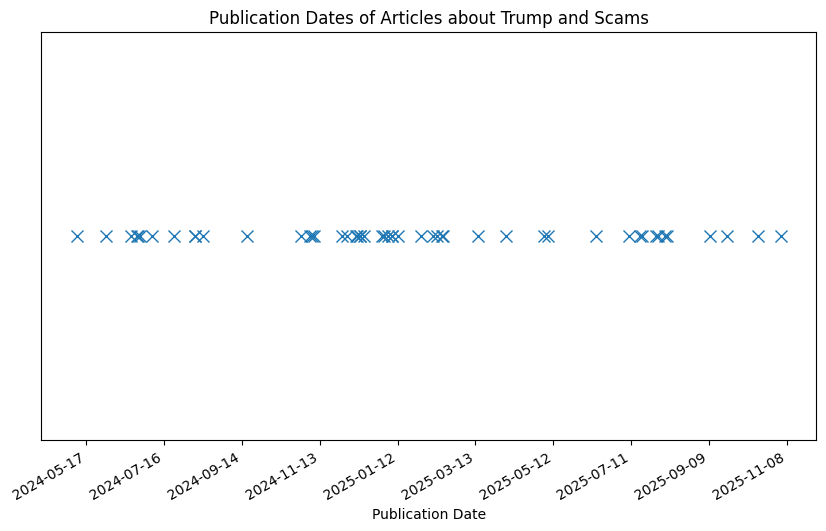

In [5]:
!pip install matplotlib

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

markerline, stemlines, baseline = plt.stem(dates, [0]*len(dates), markerfmt='x', basefmt=' ')
plt.setp(stemlines, visible=False)
plt.setp(markerline, markersize=8)
baseline.set_visible(False)

plt.annotate("", xy =(dates[-1], 0), xytext=(dates[0], 0))
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
plt.gcf().autofmt_xdate()

plt.title("Publication Dates of Articles about Trump and Scams")
plt.yticks([])
plt.xlabel("Publication Date")

plt.show()


